In [52]:
import tensorflow as tf

In [53]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.0.0


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [56]:
train_image.shape

(60000, 28, 28)

In [57]:
train_label.shape

(60000,)

In [58]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

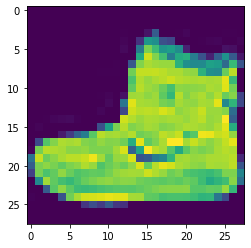

In [59]:
plt.imshow(train_image[0])   #切片，第一张

In [60]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [61]:
np.max(train_image[0])  #看一下其中的最大值，RGB范围0~255

255

In [62]:
train_label[0]

9

In [63]:
train_label    #鞋子标签为9，其他还有很多，用顺序的数值标记lebel

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [64]:
# 数据归一化范围从0~255变为0~1
train_image = train_image/255   
test_image = test_image/255

In [65]:
train_image.shape

(60000, 28, 28)

In [66]:
model = tf.keras.Sequential()
# 将二维图片转换为Flatten层一维的
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
# 28*28
# 这里选择128，Dense层不能太小，否则会舍弃很多有用信息，也不能太大，否则会过拟合
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
# 激活函数'softmax'，可以把10个输出变为10个概率分布,和为1，来表明图片属于哪一类label
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [68]:
#多分类问题softmax交叉熵计算
#categorical_crossentropy
#sparse_categorical_crossentropy   #适用于数字编码
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc']
) 

In [69]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4955 - acc: 0.8267
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3730 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3355 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3142 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2957 - acc: 0.8925


In [70]:
model.evaluate(test_image, test_label)#用test数据评估模型

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3573974230051041, 0.8716]

In [71]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

beijing[1,0,0]
shanghai[0,1,0]
shenzhen[0,0,1]

In [72]:
#独热编码来预测， 重要
train_label_onehot = tf.keras.utils.to_categorical(train_label)  #顺序编码转为独热编码

In [73]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [75]:
train_label_onehot[-1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [76]:
test_label_onehot = tf.keras.utils.to_categorical(test_label) 

In [77]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
# 采用独热编码后构建相同模型，这里代码不变
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [79]:
model.compile(optimizer = 'adam',              
              loss = 'categorical_crossentropy',
              metrics = ['acc']
)   #这里的loss使用的是categorical_crossentropy,编码方式不同对数据正确率并没有影响
# 其中也可以写为 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
# 常见优化函数SGD, RMSprop，Adam

In [80]:
model.fit(train_image, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4988 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3740 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3337 - acc: 0.8786
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3131 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2943 - acc: 0.8926


In [81]:
predict = model.predict(test_image)

In [82]:
test_image.shape

(10000, 28, 28)

In [83]:
predict.shape        #对测试的10000张图片，每张给出了10个分量的向量，和为1

(10000, 10)

In [84]:
predict[0]

array([3.88168064e-06, 3.64528105e-08, 1.02395624e-07, 2.77021215e-08,
       2.32804894e-07, 9.43534635e-03, 6.82898929e-07, 8.72256607e-03,
       2.38211186e-07, 9.81836855e-01], dtype=float32)

In [85]:
np.argmax(predict[0])           # np.argmax()找出最大概率的索引值

9

In [86]:
test_label[0]         #预测值与实际值相等，预测成功

9

In [87]:
#增加神经网络层数
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
#添加dropoutceng抑制过拟合,0.5随机丢弃50%
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [89]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),              
              loss = 'categorical_crossentropy',
              metrics = ['acc']
) 

In [90]:
model.fit(train_image, train_label_onehot, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.8781 - acc: 0.6741
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6187 - acc: 0.7814
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5700 - acc: 0.8000
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5439 - acc: 0.8094
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5250 - acc: 0.8153
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5145 - acc: 0.8186
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5091 - acc: 0.8201
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4988 - acc: 0.8245
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4912 - acc: 0.8282
Epoch 10/10
60000/60000 [==============================] - 

In [93]:
# 增加隐藏层数确实可以提高模型准确率，但是要注意过拟合
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),              
              loss = 'categorical_crossentropy',
              metrics = ['acc']
) 

In [94]:
# validation 验证test数据正确率和loss情况
history = model.fit(train_image, train_label_onehot, 
                    epochs=10,
                    validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4923 - acc: 0.8212 - val_loss: 0.4112 - val_acc: 0.8541
Epoch 2/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.3663 - acc: 0.8656 - val_loss: 0.4044 - val_acc: 0.8532
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3321 - acc: 0.8775 - val_loss: 0.3622 - val_acc: 0.8711
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3107 - acc: 0.8853 - val_loss: 0.3698 - val_acc: 0.8649
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2929 - acc: 0.8907 - val_loss: 0.3495 - val_acc: 0.8725
Epoch 6/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.2798 - acc: 0.8950 - val_loss: 0.3538 - val_acc: 0.8725
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2654 - acc: 0.9006 - val_loss: 0.

In [96]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

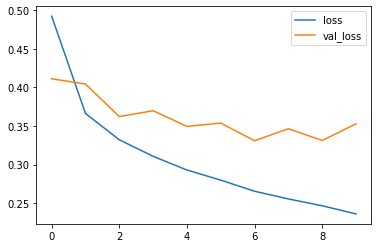

In [97]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

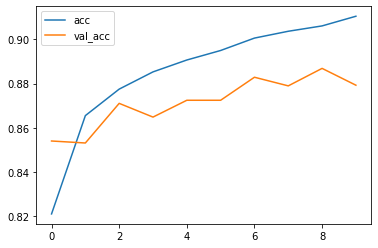

In [98]:
#epoch 过拟合了
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [99]:
#过拟合：在训练数据上得分很高，在测试数据上得分相对比较低
#欠拟合：在训练数据上得分比较低，在测试数据上得分相对比较低
#可以使用Dropout层抑制过拟合，随机减少隐藏层，最后多个结果取权重，类似增加了生物性别，在环境改变时可以更好的适应环境，抑制过拟合
#方法：dropout，正则化，图像增强。
#但是，抑制过拟合最好办法是增加训练数据
#再次调节超参数，学习速率，隐藏层单元数，训练轮次
#保证神经网络容量足够拟合数据

In [100]:
#减少网络规模之后也不容易过拟合

In [101]:
# 增加隐藏层数确实可以提高模型准确率，但是要注意过拟合
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),              
              loss = 'categorical_crossentropy',
              metrics = ['acc']
) 
history = model.fit(train_image, train_label_onehot, 
                    epochs=10,
                    validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5493 - acc: 0.8126 - val_loss: 0.4534 - val_acc: 0.8415
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4125 - acc: 0.8561 - val_loss: 0.4167 - val_acc: 0.8522
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3796 - acc: 0.8661 - val_loss: 0.4191 - val_acc: 0.8493
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3595 - acc: 0.8707 - val_loss: 0.4069 - val_acc: 0.8526
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3428 - acc: 0.8768 - val_loss: 0.3990 - val_acc: 0.8570
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3304 - acc: 0.8798 - val_loss: 0.3822 - val_acc: 0.8637
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3211 - acc: 0.8839 - val_loss: 0.

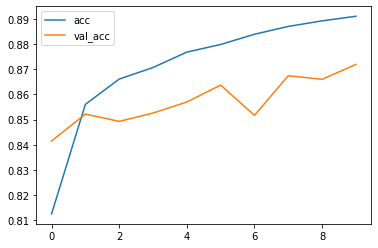

In [102]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()